<a href="https://colab.research.google.com/github/xsuryanshx/DSML-Projects/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryanshsr","key":"a9a0543bcc3ada9effac39fbb85aa675"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nnfl-nlp-lab-2

  0% 0.00/905k [00:00<?, ?B/s]
100% 905k/905k [00:00<00:00, 59.3MB/s]
  0% 0.00/3.72M [00:00<?, ?B/s]
100% 3.72M/3.72M [00:00<00:00, 123MB/s]
100% 8.74M/8.74M [00:00<00:00, 24.0MB/s]



In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input
from keras.utils.np_utils import to_categorical
import re

In [ ]:
data = pd.read_csv('/content/lab2_train.csv.zip')
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,target,text,id
0,0,awwww i fell asleep on the game but i hear the Cavs win darn!,243624
1,1,"Pizza &amp; chippies in oven. Malibu &amp; juice in hand. Winchester Bros abt 2 b on my computah screen. Can you can WIN, boys &amp; girls?",319931
2,1,bought to much stuff at Lush...smell like some fruit-chocolate-herbs-mixed candy bar,119994
3,1,sending out emails about Mountain Avenue Bridal having a huge Sample Sale this weekend!,89653
4,1,Quite doubtful wisdom,70245


In [ ]:
len(data)

224000

In [ ]:
!wget https://github.com/kmr0877/IMDB-Sentiment-Classification-CBOW-Model/raw/master/glove.6B.50d.txt.gz

--2020-11-20 19:48:47--  https://github.com/kmr0877/IMDB-Sentiment-Classification-CBOW-Model/raw/master/glove.6B.50d.txt.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kmr0877/IMDB-Sentiment-Classification-CBOW-Model/master/glove.6B.50d.txt.gz [following]
--2020-11-20 19:48:47--  https://raw.githubusercontent.com/kmr0877/IMDB-Sentiment-Classification-CBOW-Model/master/glove.6B.50d.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69182520 (66M) [application/octet-stream]
Saving to: ‘glove.6B.50d.txt.gz’

glove.6B.50d.txt.gz 100%[===================>]  65.98M   157MB/s    in 0.4s    

202

In [ ]:
! gunzip glove.6B.50d.txt.gz

In [ ]:
def read_glove_vecs(glove_file):
      with open(glove_file, 'r') as f:
          words = set()         # ensures unique values
          word_to_vec_map = {}  # this will be a dictionary mapping words to their vectors
          for line in f:
              line = line.strip().split()
              curr_word = line[0]
              words.add(curr_word)
              word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
          
          i = 1
          words_to_index = {}   # dictionary mapping words to their index in the dictionary
          index_to_words = {}   # dictionary mapping index to the word in the dictionary
          for w in sorted(words):
              words_to_index[w] = i
              index_to_words[i] = w
              i = i + 1
      return words_to_index, index_to_words, word_to_vec_map,words
word_to_index, index_to_word, word_to_vec_map,words = read_glove_vecs('/content/glove.6B.50d.txt') # alloting the index and words and vectors


In [ ]:
len(words)

400000

In [ ]:
corpus = []
for i in data['text']:
  word_vec = np.zeros((np.shape(word_to_vec_map['word'])))
  i = re.sub('[^a-zA-Z]', ' ',i)
  for j in i.split():
    try:
      word_vec += word_to_vec_map[j]
    except:
      None
  corpus.append(word_vec)
len(corpus)

224000

In [ ]:
x = np.array(corpus)
y = np.array(data['target'])
print(np.shape(x))
print(np.shape(y))

(224000, 50)
(224000,)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	  keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x, y, epochs=300, batch_size=128)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
__________________________________________________

<function matplotlib.pyplot.show>

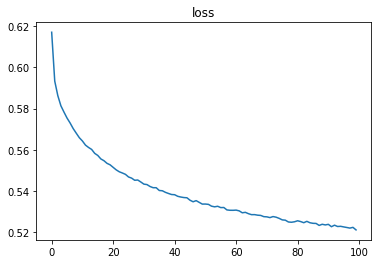

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('loss')
plt.show

<function matplotlib.pyplot.show>

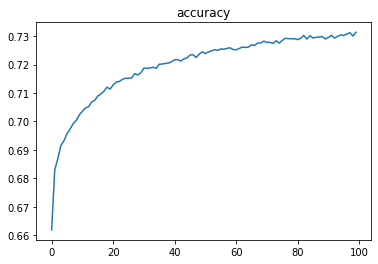

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.show

In [ ]:
test = pd.read_csv('/content/lab2_test.csv.zip')
pd.set_option('display.max_colwidth',-1)
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,id
0,@chris_d_jones Yeh applause store doesn't seem to be working,48676
1,@SchoolDuggery Tanya may be gone but we will be back,182034
2,@iphonegirl totally! except we can't ride on the sidewalk like when we were kids. a lot more safe than on the road with crazy drivers.,166136
3,"UX London 2009, bar Peter Merholz, seriously disappointing stuff. Most content suitable for Uni students not veteran practitioners",157505
4,ughh i have all these nasty ass bug bites from North Carolina on top of my bruises on my thighs... NO BUENO...no shorts for me this week,212449


In [ ]:
corpus_test = []
for i in test['text']:
  word_vec = np.zeros((np.shape(word_to_vec_map['word'])))
  i = re.sub('[^a-zA-Z]', ' ',i)
  for j in i.split():
    try:
      word_vec += word_to_vec_map[j]
    except:
      None
  corpus_test.append(word_vec)
len(corpus_test)

96000

In [ ]:
xtest = np.array(corpus_test)

In [ ]:
np.shape(xtest)

(96000, 50)

In [ ]:
ypredictions = model.predict_classes(xtest)

In [ ]:
ypredictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [ ]:
import csv
prediction = pd.DataFrame(ypredictions, columns=['target'])
prediction = prediction.assign( id = test['id'])
prediction.to_csv('/content/prediction.csv')

In [ ]:
prediction

,target,id
0,0,48676
1,0,182034
2,0,166136
3,0,157505
4,0,212449
...,...,...
95995,1,106156
95996,1,152759
95997,0,151807
95998,1,81525
